<a href="https://colab.research.google.com/github/ManelSoengas/EDA_task2/blob/main/Copia_de_EDA_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**Análisis Exploratorio**</font>


---


Análisis del conjunto de datos para obtener información, identificar patrones, detectar características y comprender las características y relaciones del conjunto de datos.




In [2]:
# Instalación de los recursos necesarios
!pip install pandas matplotlib scikit-learn wordcloud


In [3]:
# Importación de los recursos necesarios
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud


In [4]:
# Cargar datos preprocesados
df_test = pd.read_csv('/content/EXIST2021_test_labeled.tsv', sep='\t')
df_train = pd.read_csv('/content/EXIST2021_training.tsv', sep='\t')

# <font color='brown'>**Conjunto de datos**</font>


---
Estructura y organización de los datos.

1.   Estructura y organización de los datos.
2.   Representación de las categorias de la clase y número de valores de cada una de ellas.
3.   Longitud promedio de las sentencias y número de palabras en cada sentencia.
4.   Distribución de la clase.
5.   Distribución de sentencias en función del idioma y la clase.
6.   Frecuencia de las palabras más utilizadas.
7.   Frecuencia de la longitud de las sentencias.
8.   Representación de las frases más relevantes.
9.   Representación de la longitud de texto para cada clase.




In [5]:
# Estructura y organización de los datos.
print(df_train.head())


   test_case  id   source language  \
0  EXIST2021   1  twitter       en   
1  EXIST2021   2  twitter       en   
2  EXIST2021   3  twitter       en   
3  EXIST2021   4  twitter       en   
4  EXIST2021   5  twitter       en   

                                                text       task1  \
0  She calls herself "anti-feminazi" how about sh...      sexist   
1  Now, back to these women, the brave and the be...  non-sexist   
2  @CurvyBandida @Xalynne_B Wow, your skirt is ve...      sexist   
3  @AurelieGuiboud Incredible!  Beautiful!But I l...  non-sexist   
4  i find it extremely hard to believe that kelly...  non-sexist   

                    task2  
0  ideological-inequality  
1              non-sexist  
2         objectification  
3              non-sexist  
4              non-sexist  


In [6]:
# Categorias y número de valores
print(df_train['task2'].value_counts())


non-sexist                      3600
ideological-inequality           866
stereotyping-dominance           809
misogyny-non-sexual-violence     685
sexual-violence                  517
objectification                  500
Name: task2, dtype: int64


In [7]:
# Longitud promedio de las sentencias
print("Longitud promedio de las sentencias:", df_train['text'].str.len().mean())

# Número de palabras en cada sentencia
df_train['num_words'] = df_train['text'].apply(lambda x: len(x.split()))
print(df_train['num_words'].describe())


Longitud promedio de las sentencias: 176.13945821986528
count    6977.000000
mean       28.870861
std        15.884901
min         2.000000
25%        15.000000
50%        28.000000
75%        43.000000
max       101.000000
Name: num_words, dtype: float64


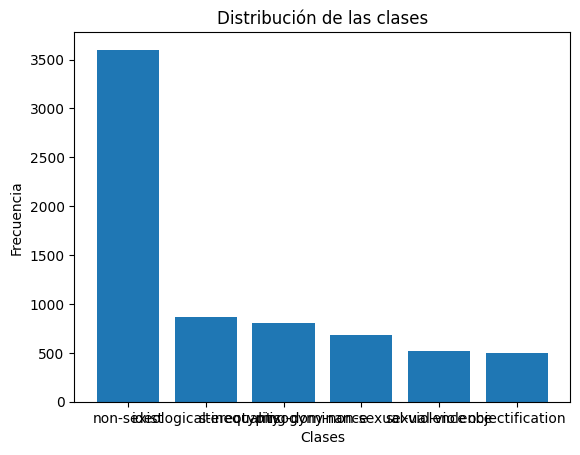

In [8]:
# Distribución de la clase
import matplotlib.pyplot as plt

class_counts = df_train['task2'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Distribución de las clases')
plt.show()


In [9]:
# Distribución de sentencias en función del idioma y la clase
import pandas as pd

contingency_table = pd.crosstab(df_train['language'], df_train['task2'])
print(contingency_table)


task2     ideological-inequality  misogyny-non-sexual-violence  non-sexist  \
language                                                                     
en                           386                           284        1800   
es                           480                           401        1800   

task2     objectification  sexual-violence  stereotyping-dominance  
language                                                            
en                    256              344                     366  
es                    244              173                     443  


In [10]:
# Frecuencia de las palabras más utilizadas
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
text_matrix = vectorizer.fit_transform(df_train['text'])

word_frequencies = text_matrix.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
sorted_frequencies = sorted(zip(feature_names, word_frequencies.flat), key=lambda x: x[1], reverse=True)
print(sorted_frequencies[:10])  # Imprime las 10 palabras más frecuentes




[('que', 4007), ('de', 3814), ('la', 2803), ('the', 2754), ('to', 2517), ('no', 2458), ('and', 2027), ('co', 2001), ('you', 1970), ('el', 1968)]


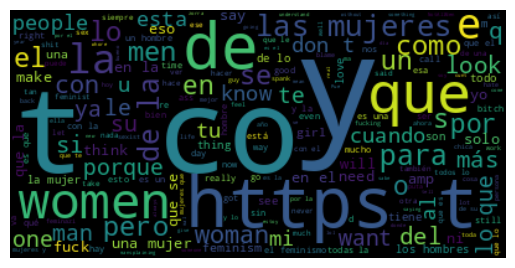

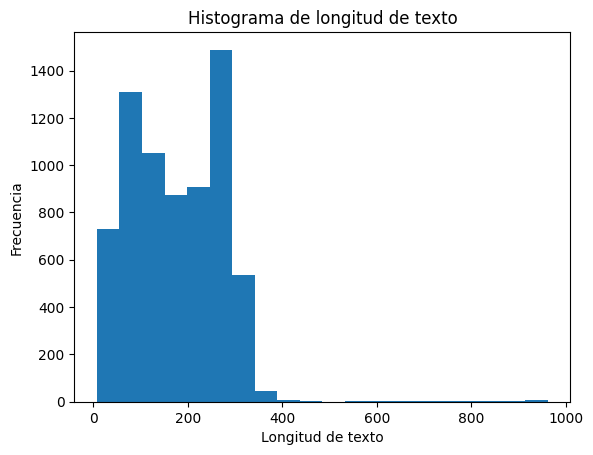

In [11]:
# Ejemplo de nube de palabras
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(df_train['text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Histograma de longitud de texto
plt.hist(df_train['text'].str.len(), bins=20)
plt.xlabel('Longitud de texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de longitud de texto')
plt.show()


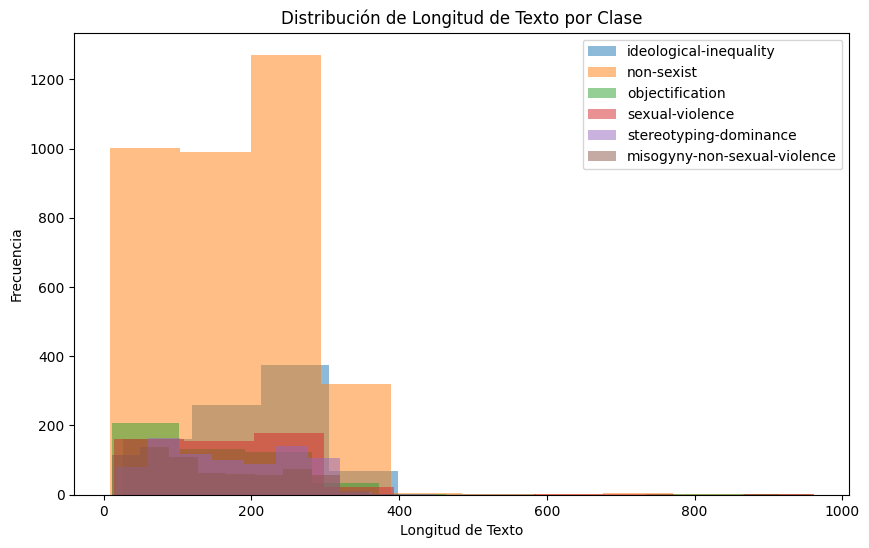

In [12]:
import matplotlib.pyplot as plt

# Calcular la longitud de texto para cada clase
class_lengths = {}
for label in df_train['task2'].unique():
    class_texts = df_train[df_train['task2'] == label]['text']
    class_lengths[label] = class_texts.str.len()

# Crear histogramas de longitud de texto por clase
plt.figure(figsize=(10, 6))
for label, lengths in class_lengths.items():
    plt.hist(lengths, alpha=0.5, label=label)

plt.xlabel('Longitud de Texto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de Texto por Clase')
plt.legend()
plt.show()


# <font color='brown'>**Frases relevantes**</font>

Se cálcula la relevancia de una frase a partir de la representación TF-IDF.
La puntuación TF-IDF se calcula multiplicando la puntuación de TF por la puntuación IDF para cada palabra en cada documento.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear una instancia del vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar los textos con el vectorizador
text_matrix = vectorizer.fit_transform(df_train['text'])

# Obtener las palabras o frases más distintivas por clase
feature_names = vectorizer.get_feature_names_out()
distinctive_phrases_by_class = {}

for label in df_train['task2'].unique():
    label_indices = df_train[df_train['task2'] == label].index
    label_text_matrix = text_matrix[label_indices]

    # Obtener el índice con el puntaje TF-IDF máximo en cada texto de la clase
    max_tfidf_indices = label_text_matrix.argmax(axis=1).ravel()

    class_distinctive_phrases = [feature_names[idx][0] for idx in max_tfidf_indices]
    distinctive_phrases_by_class[label] = class_distinctive_phrases

# Imprimir las frases más distintivas para cada clase
for label, phrases in distinctive_phrases_by_class.items():
    print(f"Clase {label}: {', '.join(str(phrase) for phrase in phrases)}")









Clase ideological-inequality: ['baawri' 'you' 'should' 'describing' 'going' 'amp' 'bbc'
 'crisalexjimenez' 'munroebergdorf' 'lost' 'crown' 'kam' 'well' 'fame'
 'suddenly' 'childbirth' 'risking' 'fyi' 'lobbist' 'radical' 'callme0la'
 '70snewangel' 'guysquiggs' 'this' 'fenpzzhufy' 'ladder' 'heard'
 'comparison' 'gang' 'olivesagan' 'dr' 'geniuses' 'rapists'
 'autumn_constant' 'brainless' 'burden' 'show'
 'environmentalistsactivistsequality' 'you' 'which' 'realfckinghanna'
 'masochist' 'ya' 'either' 'ter' 'their' 'men' 'freedom' 'through' 'an'
 'why' 'each' 'want' 'trainers' 'smh' 'like' 'bio' '9hxsk7lk9k'
 'csik9kvydl' 'construct' 'she' 'hkvrvvtulu' 'other' 'usage' 'make'
 'discriminating' 'antichoice' 'will' 'h5cflukomh' 'good' 'the' 'ask_des'
 'ingcxzfqsy' 'associated' 'rape' 'o1aujseksi' 'uninindia' 'bigotry'
 'will' 'administration' 'cafe' 'jys68wzdzm' 'law' '2bq9oehqym' 'feminism'
 'it' 're' 'passion' 'said' 'man' 'violence' '6p9lugflir' 'lesbians'
 'nothing' 'logged' 'can' 'bored' '